In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#### Join Data Frame

In [2]:
#Extraer diccionarios para crear los DF

data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


In [3]:
#Definiendo los DF y asignando a 3 variables

df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)


In [4]:
df1

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles

In [5]:
df2

id primer_nombre  apellido
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [6]:
df3

id  test_id
0   1       51
1   2       15
2   3       15
3   4       61
4   5       16
5   7       14
6   8       15
7   9        1
8  10       61
9  11       16

In [7]:
#Unir 2 DF a lo largo de columnas y asignar todos los datos.

df_filas = pd.concat([df1, df2] , axis=0)
df_filas

id primer_nombre  apellido
0  1          Alex  Anderson
1  2           Amy    Ruales
2  3     Valentina     Marin
3  4         Alice   Barbosa
4  5          Lina    Robles
0  4          Luis      Ruiz
1  5         Brian   Giralgo
2  6       Mariana   Ortegon
3  7       Marcela  Palacios
4  8        Carlos   Gallego

In [8]:
#Unir 2 DF a lo largo de filas y asignar todos los datos de las columnas

df_columnas = pd.concat([df1, df2] , axis=1)
df_columnas

id primer_nombre  apellido id primer_nombre  apellido
0  1          Alex  Anderson  4          Luis      Ruiz
1  2           Amy    Ruales  5         Brian   Giralgo
2  3     Valentina     Marin  6       Mariana   Ortegon
3  4         Alice   Barbosa  7       Marcela  Palacios
4  5          Lina    Robles  8        Carlos   Gallego

In [9]:
#Hacer un merge para todos los datos y el tercer DF con el valor id 
df_ids = pd.merge(df_filas, df3, on = ['id'],how='outer')
df_ids

id primer_nombre  apellido  test_id
0    1          Alex  Anderson     51.0
1    2           Amy    Ruales     15.0
2    3     Valentina     Marin     15.0
3    4         Alice   Barbosa     61.0
4    4          Luis      Ruiz     61.0
5    5          Lina    Robles     16.0
6    5         Brian   Giralgo     16.0
7    6       Mariana   Ortegon      NaN
8    7       Marcela  Palacios     14.0
9    8        Carlos   Gallego     15.0
10   9           NaN       NaN      1.0
11  10           NaN       NaN     61.0
12  11           NaN       NaN     16.0

In [10]:
#Hacer una merge solo los datos que tienen el mismo ′id′

df_ids = pd.merge(df_filas, df3, on = ['id'],how='inner')
df_ids

id primer_nombre  apellido  test_id
0  1          Alex  Anderson       51
1  2           Amy    Ruales       15
2  3     Valentina     Marin       15
3  4         Alice   Barbosa       61
4  4          Luis      Ruiz       61
5  5          Lina    Robles       16
6  5         Brian   Giralgo       16
7  7       Marcela  Palacios       14
8  8        Carlos   Gallego       15

### GroupBy

In [11]:
path = '/home/cuba/Documents/UNIVERSIDAD/2023-2/FCI/cursofci-2023-2/Documentos/Data/datos_alcohol.txt'

df_alcohol = pd.read_csv(path)
df_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pais                            193 non-null    object 
 1   porciones_cerveza               193 non-null    int64  
 2   porciones_licor                 193 non-null    int64  
 3   porciones_vino                  193 non-null    int64  
 4   litros_totales_de_alcohol_puro  193 non-null    float64
 5   continente                      170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [12]:
df_alcohol = df_alcohol.dropna()

In [13]:
df_alcohol.head()

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0  Afghanistan                  0                0               0   
1      Albania                 89              132              54   
2      Algeria                 25                0              14   
3      Andorra                245              138             312   
4       Angola                217               57              45   

   litros_totales_de_alcohol_puro continente  
0                             0.0         AS  
1                             4.9         EU  
2                             0.7         AF  
3                            12.4         EU  
4                             5.9         AF

In [14]:
#Ordenamos por continente y miramos el promedio de porcioens de cerveza.

df_continente = df_alcohol.groupby('continente')
df_continente['porciones_cerveza'].mean()

continente
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: porciones_cerveza, dtype: float64

En promedio el continente que toma más cerveza es 'EU' Europa con un promedio de 193.78 u.a

In [15]:
#DF con columnas de interes
df_vino = df_alcohol.porciones_vino
df_vino.describe()

count    170.000000
mean      52.823529
std       83.762227
min        0.000000
25%        1.000000
50%        8.000000
75%       73.750000
max      370.000000
Name: porciones_vino, dtype: float64

In [16]:
df_continente.porciones_licor.describe()

count        mean        std   min    25%    50%     75%    max
continente                                                                 
AF           53.0   16.339623  28.102794   0.0   1.00    3.0   19.00  152.0
AS           44.0   60.840909  84.362160   0.0   1.00   16.0   98.00  326.0
EU           45.0  132.555556  77.589115   0.0  81.00  122.0  173.00  373.0
OC           16.0   58.437500  70.504817   0.0  18.00   37.0   65.25  254.0
SA           12.0  114.750000  77.077440  25.0  65.75  108.5  148.75  302.0

In [17]:
continentes = df_alcohol['continente'].unique()
for i in continentes:
    df_con = df_alcohol[df_alcohol['continente'] == i]
    media = df_con.porciones_licor.mean()
    max = df_con.porciones_licor.max()
    min = df_con.porciones_licor.min()

    print(f" Para el continente {i}: ")
    print(f"    La media de consumo de licor es {media:.2f}")
    print(f"    La max de consumo de licor es {max:.2f}")
    print(f"    La min de consumo de licor es {min:.2f}")
    



 Para el continente AS: 
    La media de consumo de licor es 60.84
    La max de consumo de licor es 326.00
    La min de consumo de licor es 0.00
 Para el continente EU: 
    La media de consumo de licor es 132.56
    La max de consumo de licor es 373.00
    La min de consumo de licor es 0.00
 Para el continente AF: 
    La media de consumo de licor es 16.34
    La max de consumo de licor es 152.00
    La min de consumo de licor es 0.00
 Para el continente SA: 
    La media de consumo de licor es 114.75
    La max de consumo de licor es 302.00
    La min de consumo de licor es 25.00
 Para el continente OC: 
    La media de consumo de licor es 58.44
    La max de consumo de licor es 254.00
    La min de consumo de licor es 0.00


In [18]:
df_continente.mean()


porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

### Visualización


In [19]:
path  = '/home/cuba/Documents/UNIVERSIDAD/2023-2/FCI/cursofci-2023-2/Documentos/Data/visualizacion.txt'

df = pd.read_csv(path)
df

Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


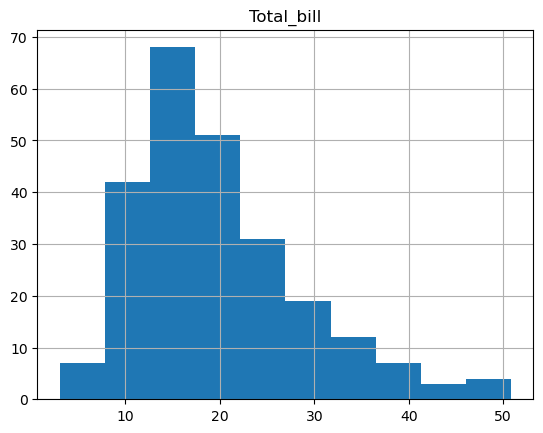

In [21]:
df['total_bill'].hist()
plt.title('Total_bill')
plt.show()

In [22]:
import seaborn as sb

/home/cuba/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


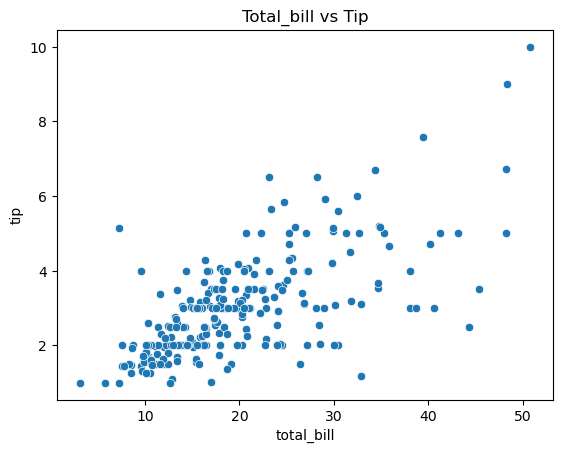

In [23]:
sb.scatterplot(df['total_bill'], df['tip'],legend='full')
plt.title('Total_bill vs Tip')
plt.show()

Text(0.5, 1.0, 'Total bill por dia')

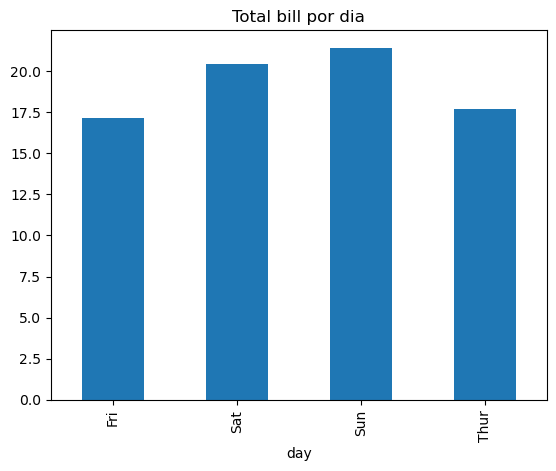

In [24]:
df.groupby('day')['total_bill'].mean().plot(kind='bar')
plt.title("Total bill por dia")

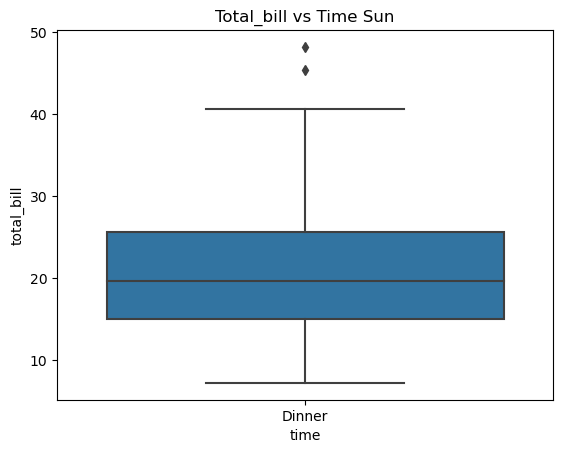

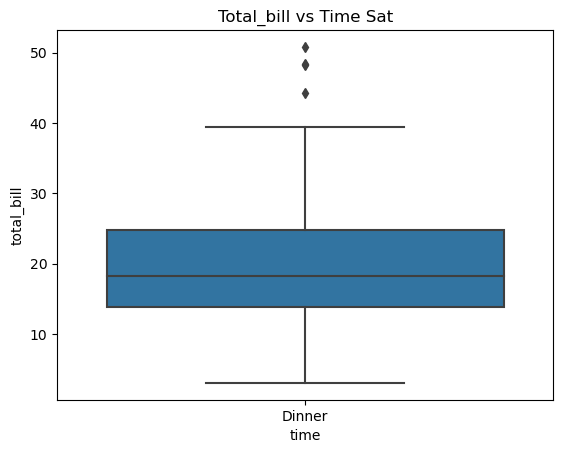

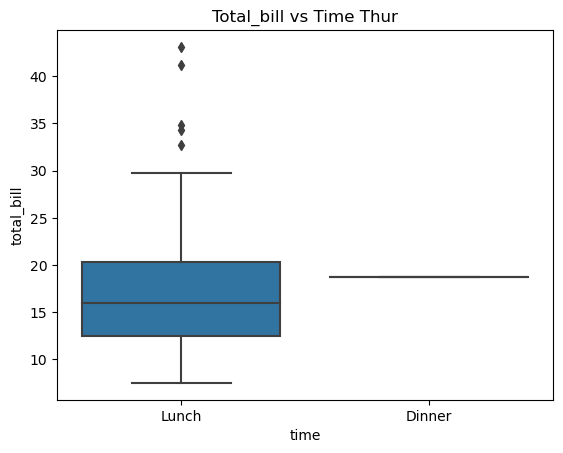

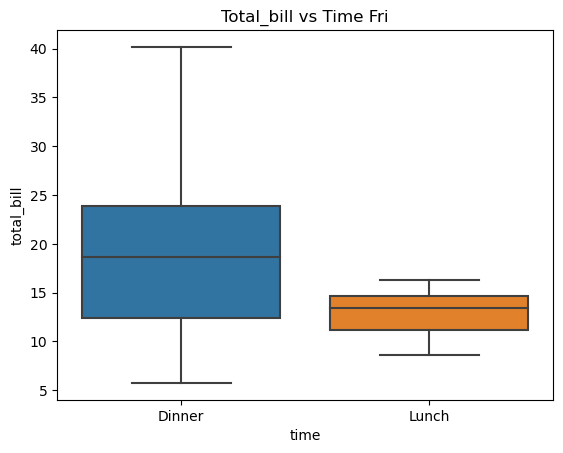

In [49]:
#Boxplot de la columna total_bill diferenciadno por cena o almuerzo

df_dt = df.groupby(['day', 'time'])
df_dias = df['day'].unique()

for i in df_dias:
    # df_dia = df_dt.get_group((i, 'Dinner'))
    # df_alm = df_dt.get_group((i, 'Lunch'))
    sb.boxplot(x='time', y='total_bill', data = df[df['day'] == i])
    plt.title(f'Total_bill vs Time {i}')
    plt.show()
    
# sb.boxplot(x='time', y='total_bill', data = [df[df['day'] == i] for i in df['day'].unique()])
# plt.title('Total_bill vs Time')